# Adult Income Dataset

This notebook showcases the dataset of 32,561 individuals, predominantly living in the United States (29,170 people), with the rest living in countries all over the world.  It illustrates information of each individuals age, work class, education, marital status, relationship, occupation, race, sex, capital gain, capital loss, hours working per week, country, and whether their income is above or below 50K. For more information regarding the dataset, please refer to: https://archive.ics.uci.edu/ml/datasets/Adult.

**Problem:** *For each individual, predict their income (above 50K / below 50K) based on specific features (age, education, occupation, etc.)*
<br><br><br>
**Data**

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
ADULT_HEADERS = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', \
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', \
                 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

adultdata = pd.read_csv('../adult.data.txt', names = ADULT_HEADERS, index_col=False)

In [3]:
adultdata.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<br><br>**Data Analysis**<br><br>
32,561 individuals<br>
15 features

In [4]:
adultdata.shape

(32561, 15)

***Age:*** ranges represent a right skewed distribution, which is not abnormal. Although surprisingly, certain individuals are working even at the age of 90!

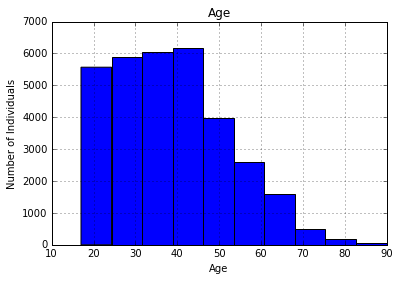

In [5]:
adultdata['age'].hist()

plt.title("Age")

plt.xlabel("Age")
plt.ylabel("Number of Individuals")

In [6]:
adultdata[adultdata['age']>88].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
1935,90,Private,221832,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
2891,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0,0,40,Puerto-Rico,<=50K


***Workclass:*** approximately 70% of workers work in the private sector, followed by those who are self-employed or work for various government organizations.

In [7]:
adultdata['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [8]:
adultdata['workclass'].value_counts(normalize=True)

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64

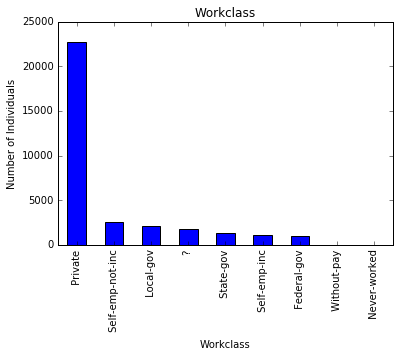

In [9]:
adultdata['workclass'].value_counts().plot(kind='bar')

plt.title("Workclass")

plt.xlabel("Workclass")
plt.ylabel("Number of Individuals")

***Education:*** 32% of individuals in this dataset are highschool graduates, along with 22% who completed some college, and 16% who obtained a bachelors degree.

In [10]:
adultdata['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [11]:
adultdata['education'].value_counts(normalize=True)

 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64

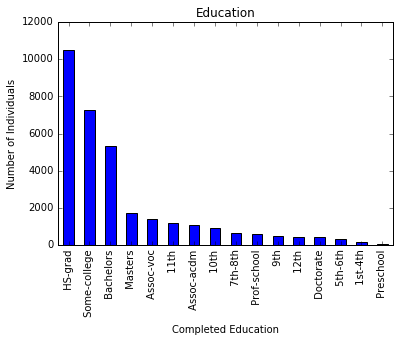

In [12]:
adultdata['education'].value_counts().plot(kind='bar')

plt.title("Education")

plt.xlabel("Completed Education")
plt.ylabel("Number of Individuals")

***Marital Status:*** Married, never married, and divorced are the top three percentages of this category

In [13]:
adultdata['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [14]:
adultdata['marital-status'].value_counts(normalize=True)

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital-status, dtype: float64

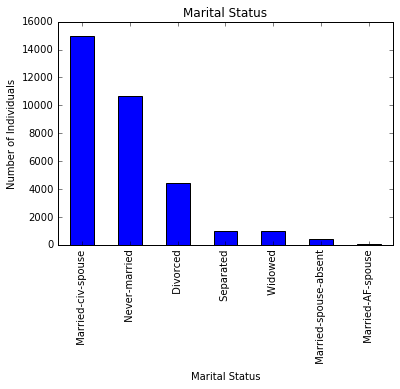

In [15]:
adultdata['marital-status'].value_counts().plot(kind='bar')

plt.title("Marital Status")

plt.xlabel("Marital Status")
plt.ylabel("Number of Individuals")

***Occupation:*** this varies, and we will see more details below pertaining to occupations above and below 50k

In [16]:
adultdata['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
adultdata['occupation'].value_counts(normalize=True)

 Prof-specialty       0.127146
 Craft-repair         0.125887
 Exec-managerial      0.124873
 Adm-clerical         0.115783
 Sales                0.112097
 Other-service        0.101195
 Machine-op-inspct    0.061485
 ?                    0.056601
 Transport-moving     0.049046
 Handlers-cleaners    0.042075
 Farming-fishing      0.030527
 Tech-support         0.028500
 Protective-serv      0.019932
 Priv-house-serv      0.004576
 Armed-Forces         0.000276
Name: occupation, dtype: float64

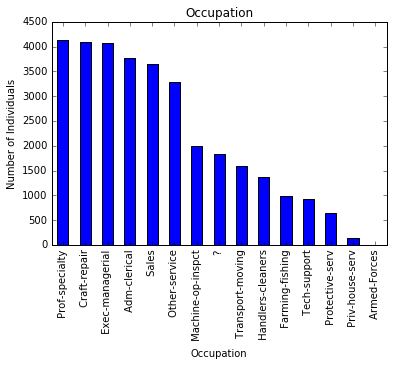

In [18]:
adultdata['occupation'].value_counts().plot(kind='bar')

plt.title("Occupation")

plt.xlabel("Occupation")
plt.ylabel("Number of Individuals")

***Relationship:*** Difficult to grasp the difference between not-in-family and unmarried. Also, own-child is an interesting feature, and other-relative is slightly confusing.

In [19]:
adultdata['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [20]:
adultdata['relationship'].value_counts(normalize=True)

 Husband           0.405178
 Not-in-family     0.255060
 Own-child         0.155646
 Unmarried         0.105832
 Wife              0.048156
 Other-relative    0.030128
Name: relationship, dtype: float64

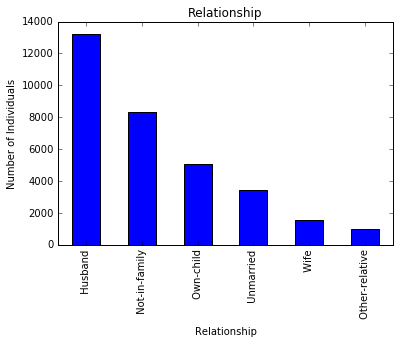

In [21]:
adultdata['relationship'].value_counts().plot(kind='bar')

plt.title("Relationship")

plt.xlabel("Relationship")
plt.ylabel("Number of Individuals")

***Race:*** 85% white, 9% black individuals

In [22]:
adultdata['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [23]:
adultdata['race'].value_counts(normalize=True)

 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: race, dtype: float64

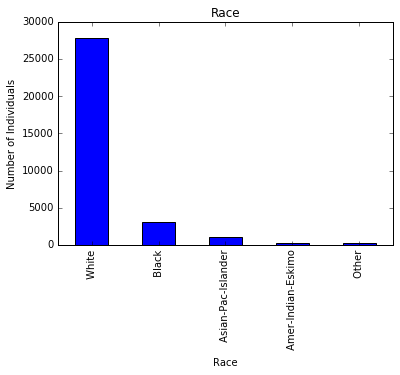

In [24]:
adultdata['race'].value_counts().plot(kind='bar')

plt.title("Race")

plt.xlabel("Race")
plt.ylabel("Number of Individuals")

***Sex:*** 67% males, 33% females

In [25]:
adultdata['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [26]:
adultdata['sex'].value_counts(normalize=True)

 Male      0.669205
 Female    0.330795
Name: sex, dtype: float64

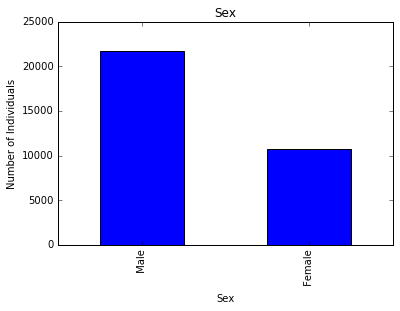

In [27]:
adultdata['sex'].value_counts().plot(kind='bar')

plt.title("Sex")

plt.xlabel("Sex")
plt.ylabel("Number of Individuals")

***Capital Gain:*** the majority have a capital gain of 0, although some were more lucky.

In [28]:
adultdata['capital-gain'].value_counts().head(10)

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
Name: capital-gain, dtype: int64

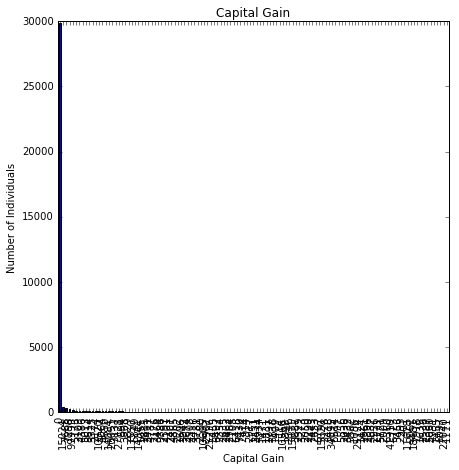

In [29]:
adultdata['capital-gain'].value_counts().plot(kind='bar', figsize=(7,7))

plt.title("Capital Gain")

plt.xlabel("Capital Gain")
plt.ylabel("Number of Individuals")

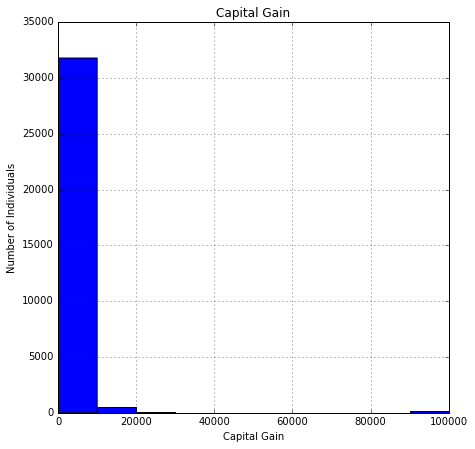

In [30]:
adultdata['capital-gain'].hist(figsize=(7,7))

plt.title("Capital Gain")

plt.xlabel("Capital Gain")
plt.ylabel("Number of Individuals")

***Capital Loss:*** the majority lost 0. For those who did lose, the maximum amount lost was $4356

In [31]:
adultdata['capital-loss'].value_counts().head(10)

0       31042
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
Name: capital-loss, dtype: int64

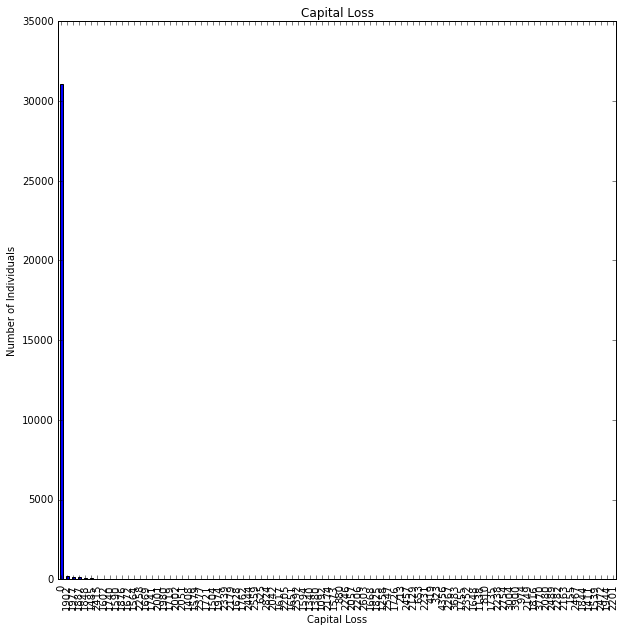

In [32]:
adultdata['capital-loss'].value_counts().plot(kind='bar', figsize=(10,10))

plt.title("Capital Loss")

plt.xlabel("Capital Loss")
plt.ylabel("Number of Individuals")

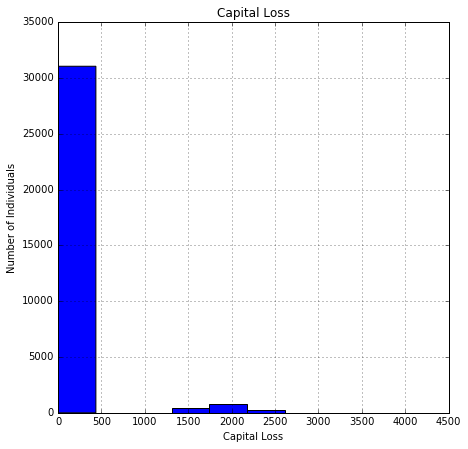

In [33]:
adultdata['capital-loss'].hist(figsize=(7,7))

plt.title("Capital Loss")

plt.xlabel("Capital Loss")
plt.ylabel("Number of Individuals")

***Hours per week:*** the majority ranges between 40-50 hours per week, which is known to be a standard work week. It would be interesting to verify if this is what is written on their job description, or is it an accurate depiction of the hours that they actually work. Are they omitting overtime hours, or is that included?

In [34]:
adultdata['hours-per-week'].value_counts().head(10)

40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
Name: hours-per-week, dtype: int64

In [35]:
adultdata['hours-per-week'].value_counts(normalize=True).head(10)

40    0.467338
50    0.086576
45    0.056018
60    0.045300
35    0.039833
20    0.037591
30    0.035288
55    0.021314
25    0.020700
48    0.015878
Name: hours-per-week, dtype: float64

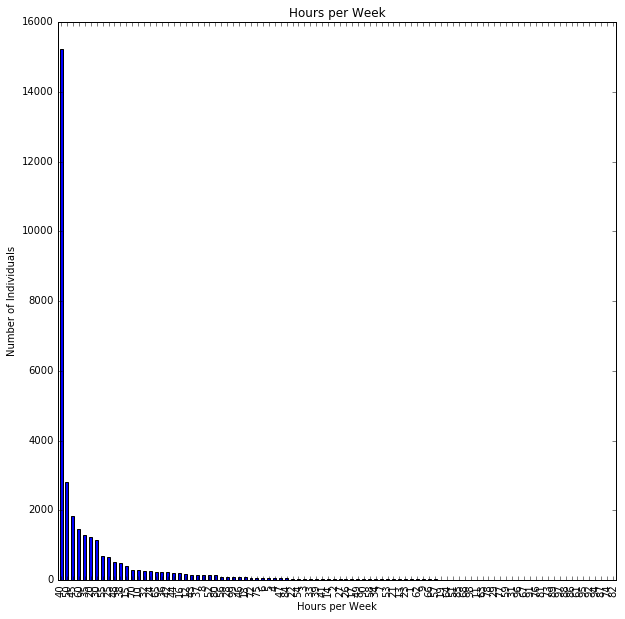

In [36]:
adultdata['hours-per-week'].value_counts().plot(kind='bar', figsize=(10,10))

plt.title("Hours per Week")

plt.xlabel("Hours per Week")
plt.ylabel("Number of Individuals")

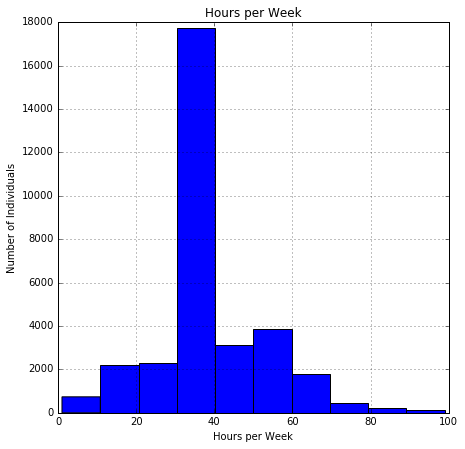

In [37]:
adultdata['hours-per-week'].hist(figsize=(7,7))

plt.title("Hours per Week")

plt.xlabel("Hours per Week")
plt.ylabel("Number of Individuals")

***Native Country:*** I take this as the country they are currently working in. But the fact that they state "native-country", that could also be defined as their country of origin, where they were born.

In [38]:
adultdata['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [39]:
adultdata['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

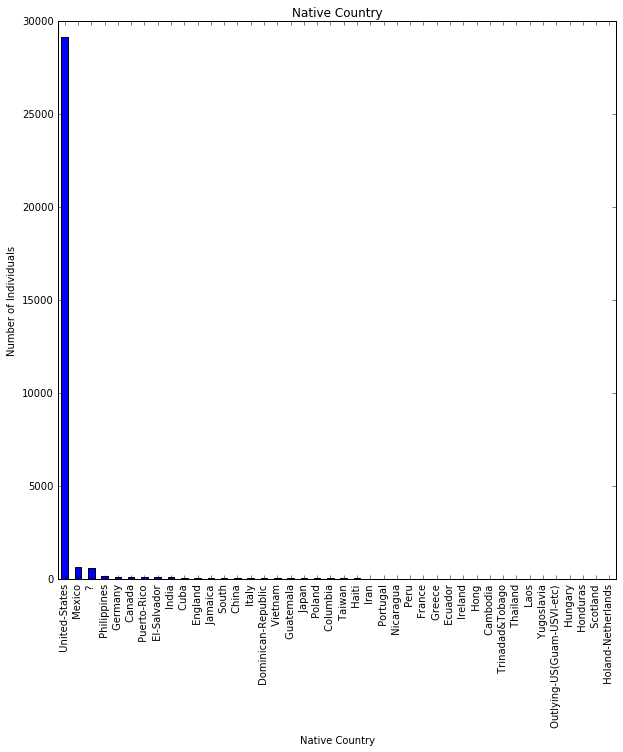

In [40]:
adultdata['native-country'].value_counts().plot(kind='bar', figsize=(10,10))

plt.title("Native Country")

plt.xlabel("Native Country")
plt.ylabel("Number of Individuals")

***Income:*** this is what we will predict based on the previous features. Interesting, but not surprising, to see the contrast between the percentages above and below 50k.

In [41]:
adultdata['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [42]:
adultdata['income'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

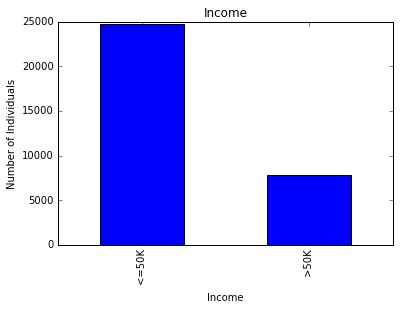

In [43]:
adultdata['income'].value_counts().plot(kind='bar')

plt.title("Income")

plt.xlabel("Income")
plt.ylabel("Number of Individuals")

  <br><br>  
**Data Cleaning and diving deeper into Analysis**

Creating an income column indicating 0 for individuals <=50k, and 1 for >50k

In [44]:
adults_df = adultdata
adults_df['over50k'] = adultdata['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [45]:
adults_df[0:10]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,over50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


In [46]:
adults_df['over50k'].value_counts()

0    24720
1     7841
Name: over50k, dtype: int64

***Relationship between Age and Salary:*** those with an income under 50k are 0, and those with an income over 50k are 1.

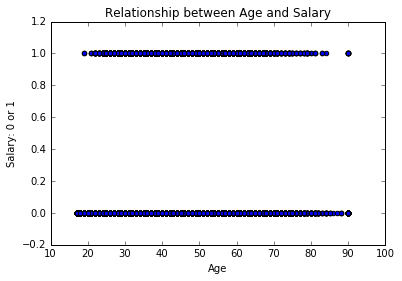

In [47]:
adults_df.plot(kind='scatter',x='age', y='over50k')

plt.title("Relationship between Age and Salary")

plt.xlabel("Age")
plt.ylabel("Salary: 0 or 1")

***Relationship between Age and Total number of people with Salary over/under 50k:*** the red are the individuals who make under 50k and the blue are those who make over 50k, along with their age groups.

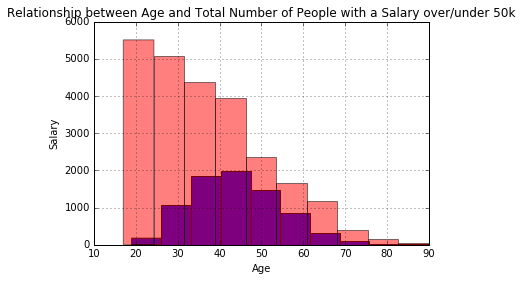

In [48]:
adults_over50k = adults_df[adults_df['over50k'] == 1]
adults_under50k = adults_df[adults_df['over50k'] == 0]

adults_df[adults_df['over50k'] == 1]['age'].hist(color='b')
adults_df[adults_df['over50k'] == 0]['age'].hist(color='r', alpha=0.5)
plt.title("Relationship between Age and Total Number of People with a Salary over/under 50k")
plt.xlabel("Age")
plt.ylabel("Salary")

24% of individuals make over 50k

In [49]:
len(adults_df[adults_df['over50k'] == 1]) / len(adults_df)

0.2408095574460244

***Numeric Data***: viewing the mean, min and max for each variable gives us a better idea of the data we are working with

In [50]:
adults_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,over50k
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


***Occupation:*** the visualizations below give us a better picture of which individuals obtain which occupations and  their salary amount

Occupations over 50k: (some occupations overlap)

In [51]:
adults_over50k['occupation'].value_counts()

 Exec-managerial      1968
 Prof-specialty       1859
 Sales                 983
 Craft-repair          929
 Adm-clerical          507
 Transport-moving      320
 Tech-support          283
 Machine-op-inspct     250
 Protective-serv       211
 ?                     191
 Other-service         137
 Farming-fishing       115
 Handlers-cleaners      86
 Priv-house-serv         1
 Armed-Forces            1
Name: occupation, dtype: int64

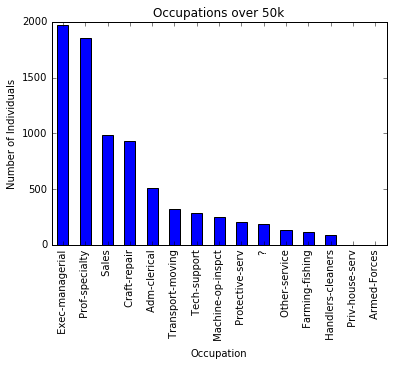

In [52]:
adults_over50k['occupation'].value_counts().plot(kind='bar')

plt.title("Occupations over 50k")

plt.xlabel("Occupation")
plt.ylabel("Number of Individuals")

Occupations under 50k:

In [53]:
adults_under50k['occupation'].value_counts()

 Adm-clerical         3263
 Craft-repair         3170
 Other-service        3158
 Sales                2667
 Prof-specialty       2281
 Exec-managerial      2098
 Machine-op-inspct    1752
 ?                    1652
 Handlers-cleaners    1284
 Transport-moving     1277
 Farming-fishing       879
 Tech-support          645
 Protective-serv       438
 Priv-house-serv       148
 Armed-Forces            8
Name: occupation, dtype: int64

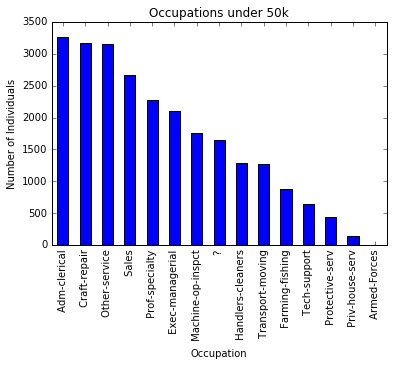

In [54]:
adults_under50k['occupation'].value_counts().plot(kind='bar')

plt.title("Occupations under 50k")

plt.xlabel("Occupation")
plt.ylabel("Number of Individuals")

  <br><br>
**Selected Algorithms:**

Three algorithms to be implemented:
* Logistic Regression
* Random Forest
* Nearest Neighbors



Logistic Regression: this is a supervised learning, binary classification problem to predict whether income is 0 or 1 for each individual. Predictive features are categorical, and the outcome is discrete. Logistic Regression is a good probability function to execute this task.
<br><br>
Random Forest: develops a large collection of decorrelated decision trees to predict the correct class. Many trees together can be a very powerful classifier, and provide smooth decision boundaries.
<br><br>
Nearest Neighbors: predicts the class using statistical estimation of the distance functions to determine the most common class.
<br><br>
 

<br><br>***Data Modelling***

Conversion of categorical variables into dummy/indicator variables for 'occupation'

In [55]:
occ_indicators = pd.get_dummies(adults_df['occupation'])
occ_indicators[0:10]

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [56]:
adults_df = adults_df.merge(occ_indicators, suffixes=('', ''),
                            left_index=True, right_index=True)

<br><br>
***Model #1:*** Features are **Age** and **Occupation**

In [57]:
FEATURES = ['age'] + list(occ_indicators.columns)
TARGET = ['over50k']

In [58]:
X = adults_df[FEATURES].values
y = adults_df[TARGET].values.ravel()

X

array([[ 39.,   0.,   1., ...,   0.,   0.,   0.],
       [ 50.,   0.,   0., ...,   0.,   0.,   0.],
       [ 38.,   0.,   0., ...,   0.,   0.,   0.],
       ..., 
       [ 58.,   0.,   1., ...,   0.,   0.,   0.],
       [ 22.,   0.,   1., ...,   0.,   0.,   0.],
       [ 52.,   0.,   0., ...,   0.,   0.,   0.]])

In [59]:
y

array([0, 0, 0, ..., 0, 0, 1])

<br><br>
***Model 1a: Logistic Regression:*** 

In [60]:
lclf = LogisticRegression(C=1.)
lclf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The negative coefficients mean it will predict 0, and positive will predict 1, which looks correct

In [61]:
pd.Series(data=lclf.coef_.ravel(), index=FEATURES)

age                   0.040857
 ?                   -1.006875
 Adm-clerical        -0.392677
 Armed-Forces        -0.062771
 Craft-repair         0.206383
 Exec-managerial      1.300077
 Farming-fishing     -0.768287
 Handlers-cleaners   -1.038578
 Machine-op-inspct   -0.491163
 Other-service       -1.644338
 Priv-house-serv     -2.318903
 Prof-specialty       1.219874
 Protective-serv      0.722969
 Sales                0.492560
 Tech-support         0.708378
 Transport-moving    -0.014821
dtype: float64

The following shows the odds of the individuals having a salary over 50k. This is why Exec-managerial positions show almost 4 times likely of getting a salary over 50k. Tech support shows 2 times more likely of having a salary over 50k. Age is harder to interpret, but shows that the higher the age, the higher the chance.

In [62]:
pd.Series(data=np.e**(lclf.coef_.ravel()), index=FEATURES)

age                   1.041703
 ?                    0.365359
 Adm-clerical         0.675247
 Armed-Forces         0.939159
 Craft-repair         1.229224
 Exec-managerial      3.669579
 Farming-fishing      0.463807
 Handlers-cleaners    0.353958
 Machine-op-inspct    0.611915
 Other-service        0.193140
 Priv-house-serv      0.098381
 Prof-specialty       3.386762
 Protective-serv      2.060542
 Sales                1.636500
 Tech-support         2.030694
 Transport-moving     0.985288
dtype: float64

<br><br>***Accuracy Score:*** 77%.

In [63]:
from sklearn.cross_validation import cross_val_score

cross_val_score(lclf, X, y)

array([ 0.76607702,  0.76699834,  0.77259744])

In [64]:
cross_val_score(lclf, X, y, cv=10)

array([ 0.76358612,  0.76719902,  0.76566339,  0.7730344 ,  0.76996314,
        0.76167076,  0.77211302,  0.7705774 ,  0.77457002,  0.77088452])

In [65]:
y_pred = lclf.predict(X)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

***Error:*** 23%

In [66]:
mean_squared_error(y, y_pred)

0.23092042627683426

In [67]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[23188,  1532],
       [ 5987,  1854]])

Therefore!

QUESTION: Cross validation helps with not using the answers of y that we have?
Does it help with eliminating overfitting?
This error means that it is a small error, therefore there is overfitting? Or we are just pretty accurate?
How to explain confusion matrix

<br><br>***Model 1b: Random Forest***

In [68]:
rfr = RandomForestClassifier()
rfr.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

***Accuracy Score:*** 77%

In [69]:
cross_val_score(rfr, X, y)

array([ 0.77390824,  0.77565874,  0.77351884])

In [70]:
cross_val_score(rfr, X, y, cv=10)

array([ 0.77310408,  0.77610565,  0.77119165,  0.78531941,  0.77518428,
        0.77272727,  0.77487715,  0.76074939,  0.77979115,  0.77395577])

In [71]:
y_pred2 = rfr.predict(X)
y_pred2

array([0, 1, 0, ..., 0, 0, 1])

***Error:*** 21%

In [72]:
mean_squared_error(y, y_pred2)

0.21467399649887903

In [73]:
confusion_matrix(y, y_pred2)

array([[22443,  2277],
       [ 4713,  3128]])

Therefore!!

<br><br>
***Model 1c: Nearest Neighbors***

In [74]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

***Accuracy Score:*** 74%

In [75]:
cross_val_score(knn, X, y)

array([ 0.74488668,  0.74700571,  0.7326085 ])

In [76]:
cross_val_score(knn, X, y, cv=10)

array([ 0.73226896,  0.73157248,  0.74846437,  0.745086  ,  0.75337838,
        0.73218673,  0.7487715 ,  0.74416462,  0.74293612,  0.74017199])

In [77]:
y_pred3 = knn.predict(X)
y_pred3

array([0, 1, 0, ..., 0, 0, 1])

***Error:*** 26%

In [78]:
mean_squared_error(y, y_pred3)

0.25960504898498205

In [79]:
confusion_matrix(y, y_pred3)

array([[20984,  3736],
       [ 4717,  3124]])

The random forest algorithm has highest accuracy score (77%) and lowest error (21.4%).

<br><br>
***Data Modelling preparation for model #2***

Features:

In [80]:
adults_df['education'][0:10]

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
5       Masters
6           9th
7       HS-grad
8       Masters
9     Bachelors
Name: education, dtype: object

Conversion to dummy variables for 'education'

In [81]:
edu = pd.get_dummies(adults_df['education'])
edu[0:10]

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [82]:
adults_df = adults_df.merge(edu, suffixes=('', ''),
                            left_index=True, right_index=True)

<br><br>***Model #2:*** Features are **Age** and **Education**

In [83]:
FEATURES2 = ['age'] + list(edu.columns)
TARGET2 = ['over50k']

In [84]:
X = adults_df[FEATURES2].values
y = adults_df[TARGET2].values.ravel()

In [85]:
print(X)
print(y)

[[ 39.   0.   0. ...,   0.   0.   0.]
 [ 50.   0.   0. ...,   0.   0.   0.]
 [ 38.   0.   0. ...,   0.   0.   0.]
 ..., 
 [ 58.   0.   0. ...,   0.   0.   0.]
 [ 22.   0.   0. ...,   0.   0.   0.]
 [ 52.   0.   0. ...,   0.   0.   0.]]
[0 0 0 ..., 0 0 1]


<br><br>
***Model #2a: Logistic Regression***

In [86]:
lclf2 = LogisticRegression(C=1.)
lclf2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
pd.Series(data=lclf2.coef_.ravel(), index=FEATURES2)

age              0.042485
 10th           -1.216419
 11th           -1.273251
 12th           -0.782416
 1st-4th        -1.839654
 5th-6th        -1.645063
 7th-8th        -1.717585
 9th            -1.556503
 Assoc-acdm      0.466741
 Assoc-voc       0.484799
 Bachelors       1.205436
 Doctorate       2.269646
 HS-grad        -0.211260
 Masters         1.584543
 Preschool      -1.517223
 Prof-school     2.378533
 Some-college    0.151552
dtype: float64

The coefficients look accurate, with Prof-school, Doctorate and Masters being the top three that have the strongest odds of a salary over 50k.

In [88]:
pd.Series(data=np.e**(lclf2.coef_.ravel()), index=FEATURES2)

age               1.043400
 10th             0.296289
 11th             0.279920
 12th             0.457300
 1st-4th          0.158872
 5th-6th          0.193000
 7th-8th          0.179499
 9th              0.210872
 Assoc-acdm       1.594789
 Assoc-voc        1.623848
 Bachelors        3.338213
 Doctorate        9.675978
 HS-grad          0.809563
 Masters          4.877064
 Preschool        0.219320
 Prof-school     10.789065
 Some-college     1.163639
dtype: float64

<br><br>
***Accuracy Score:*** 78.2%

In [89]:
cross_val_score(lclf2, X, y)

array([ 0.78063387,  0.7810024 ,  0.78245646])

In [90]:
cross_val_score(lclf2, X, y, cv=10)

array([ 0.77770955,  0.77856265,  0.79023342,  0.78101966,  0.78409091,
        0.77979115,  0.78071253,  0.78439803,  0.78286241,  0.78071253])

In [91]:
y_pred4 = lclf2.predict(X)
y_pred4

array([0, 1, 0, ..., 0, 0, 0])

***Error:*** 21.8%

In [92]:
mean_squared_error(y, y_pred4)

0.21823654064678602

In [93]:
confusion_matrix(y, y_pred4)

array([[23344,  1376],
       [ 5730,  2111]])

<br><br>***Model 2b: Random Forest***

In [94]:
rfr2 = RandomForestClassifier()
rfr2.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

***Accuracy Score:*** 78.7%

In [95]:
cross_val_score(rfr2, X, y)

array([ 0.78376635,  0.78846508,  0.78669492])

In [96]:
cross_val_score(rfr2, X, y, cv=10)

array([ 0.77985877,  0.78562654,  0.79576167,  0.78040541,  0.79391892,
        0.79023342,  0.78961916,  0.79299754,  0.78685504,  0.78562654])

In [97]:
y_pred5 = rfr2.predict(X)
y_pred5

array([0, 1, 0, ..., 0, 0, 0])

***Error:*** 20%

In [98]:
mean_squared_error(y, y_pred5)

0.20361782500537454

In [99]:
confusion_matrix(y, y_pred5)

array([[23080,  1640],
       [ 4990,  2851]])

<br><br>
***Model 2c: Nearest Neighbors***

In [100]:
knn2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn2.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

***Accuracy Score:*** 75%

In [101]:
cross_val_score(knn2, X, y)

array([ 0.74424175,  0.74894048,  0.751313  ])

In [102]:
cross_val_score(knn2, X, y, cv=10)

array([ 0.75683144,  0.76013514,  0.75644963,  0.73863636,  0.76658477,
        0.74017199,  0.74447174,  0.76044226,  0.73740786,  0.75307125])

In [103]:
y_pred6 = knn2.predict(X)
y_pred6

array([0, 0, 0, ..., 0, 0, 1])

***Error:*** 24.5%

In [104]:
mean_squared_error(y, y_pred6)

0.24541629556831793

In [105]:
confusion_matrix(y, y_pred6)

array([[21533,  3187],
       [ 4804,  3037]])

The random forest algorithm has highest accuracy score (78.7%) and lowest error (20%).

<br><br>
***Model 3:*** Features are **Age**, **Education** and **Occupation**

In [106]:
FEATURES3 = ['age'] + list(edu.columns) + list(occ_indicators.columns)
TARGET3 = ['over50k']

In [107]:
FEATURES3

['age',
 ' 10th',
 ' 11th',
 ' 12th',
 ' 1st-4th',
 ' 5th-6th',
 ' 7th-8th',
 ' 9th',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' Bachelors',
 ' Doctorate',
 ' HS-grad',
 ' Masters',
 ' Preschool',
 ' Prof-school',
 ' Some-college',
 ' ?',
 ' Adm-clerical',
 ' Armed-Forces',
 ' Craft-repair',
 ' Exec-managerial',
 ' Farming-fishing',
 ' Handlers-cleaners',
 ' Machine-op-inspct',
 ' Other-service',
 ' Priv-house-serv',
 ' Prof-specialty',
 ' Protective-serv',
 ' Sales',
 ' Tech-support',
 ' Transport-moving']

In [108]:
TARGET3

['over50k']

In [109]:
X = adults_df[FEATURES3].values
y = adults_df[TARGET3].values.ravel()

In [110]:
print(X)
print(y)

[[ 39.   0.   0. ...,   0.   0.   0.]
 [ 50.   0.   0. ...,   0.   0.   0.]
 [ 38.   0.   0. ...,   0.   0.   0.]
 ..., 
 [ 58.   0.   0. ...,   0.   0.   0.]
 [ 22.   0.   0. ...,   0.   0.   0.]
 [ 52.   0.   0. ...,   0.   0.   0.]]
[0 0 0 ..., 0 0 1]


<br><br>
***Model 3a: Logistic Regression***

In [111]:
lclf3 = LogisticRegression(C=1.)
lclf3.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
pd.Series(data=lclf3.coef_.ravel(), index=FEATURES3)

age                   0.043114
 10th                -1.116829
 11th                -1.138202
 12th                -0.680776
 1st-4th             -1.602914
 5th-6th             -1.333869
 7th-8th             -1.533785
 9th                 -1.333270
 Assoc-acdm           0.322973
 Assoc-voc            0.350141
 Bachelors            0.904070
 Doctorate            1.983530
 HS-grad             -0.209690
 Masters              1.202165
 Preschool           -1.222567
 Prof-school          2.098915
 Some-college         0.067076
 ?                   -1.040642
 Adm-clerical        -0.483146
 Armed-Forces        -0.119584
 Craft-repair         0.392037
 Exec-managerial      0.883748
 Farming-fishing     -0.575503
 Handlers-cleaners   -0.726186
 Machine-op-inspct   -0.159964
 Other-service       -1.433703
 Priv-house-serv     -1.941924
 Prof-specialty       0.297220
 Protective-serv      0.649546
 Sales                0.329552
 Tech-support         0.410868
 Transport-moving     0.274649
dtype: f

In [113]:
pd.Series(data=np.e**(lclf3.coef_.ravel()), index=FEATURES3)

age                   1.044057
 10th                 0.327316
 11th                 0.320394
 12th                 0.506224
 1st-4th              0.201309
 5th-6th              0.263456
 7th-8th              0.215718
 9th                  0.263614
 Assoc-acdm           1.381228
 Assoc-voc            1.419268
 Bachelors            2.469635
 Doctorate            7.268353
 HS-grad              0.810835
 Masters              3.327311
 Preschool            0.294473
 Prof-school          8.157317
 Some-college         1.069377
 ?                    0.353228
 Adm-clerical         0.616840
 Armed-Forces         0.887290
 Craft-repair         1.479993
 Exec-managerial      2.419953
 Farming-fishing      0.562422
 Handlers-cleaners    0.483750
 Machine-op-inspct    0.852174
 Other-service        0.238424
 Priv-house-serv      0.143428
 Prof-specialty       1.346111
 Protective-serv      1.914672
 Sales                1.390345
 Tech-support         1.508127
 Transport-moving     1.316068
dtype: f

<br><br>
***Accuracy Score:*** 80.2%

In [114]:
cross_val_score(lclf3, X, y)

array([ 0.79104478,  0.79086051,  0.7936976 ])

In [115]:
cross_val_score(lclf3, X, y, cv=10)

array([ 0.78784157,  0.78685504,  0.79883292,  0.79269042,  0.80067568,
        0.78439803,  0.78439803,  0.79637592,  0.79514742,  0.78869779])

In [116]:
y_pred7 = lclf3.predict(X)
y_pred7

array([0, 1, 0, ..., 0, 0, 0])

***Error:*** 20.8%

In [117]:
mean_squared_error(y, y_pred7)

0.20810171677774025

In [118]:
confusion_matrix(y, y_pred7)

array([[23162,  1558],
       [ 5218,  2623]])

<br><br>
***Model 3b: Random Forest***

In [119]:
rfr3 = RandomForestClassifier()
rfr3.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

***Accuracy Score:*** 77.6%

In [120]:
cross_val_score(rfr3, X, y)

array([ 0.77446103,  0.77547448,  0.77425597])

In [121]:
cross_val_score(rfr3, X, y, cv=10)

array([ 0.77310408,  0.77395577,  0.77641278,  0.77395577,  0.78040541,
        0.7791769 ,  0.7705774 ,  0.77395577,  0.78194103,  0.77242015])

In [122]:
y_pred8 = rfr3.predict(X)
y_pred8

array([0, 1, 0, ..., 0, 0, 1])

***Error:*** 17.6%

In [123]:
mean_squared_error(y, y_pred8)

0.17594668468413133

In [124]:
confusion_matrix(y, y_pred8)

array([[22936,  1784],
       [ 3945,  3896]])

<br><br>
***Model 3c: Nearest Neighbors***

In [125]:
knn3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn3.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

***Accuracy Score:*** 75.9%

In [126]:
cross_val_score(knn3, X, y)

array([ 0.76239174,  0.75667957,  0.76190915])

In [127]:
cross_val_score(knn3, X, y, cv=10)

array([ 0.75099785,  0.75952088,  0.76719902,  0.74539312,  0.77334152,
        0.75982801,  0.7463145 ,  0.75982801,  0.77027027,  0.76044226])

In [128]:
y_pred9 = knn3.predict(X)
y_pred9

array([0, 1, 0, ..., 0, 0, 1])

***Error:*** 20%

In [129]:
mean_squared_error(y, y_pred9)

0.20128374435674581

In [130]:
confusion_matrix(y, y_pred9)

array([[22279,  2441],
       [ 4113,  3728]])

The logistic regression algorithm has highest accuracy score (80.2%) and lowest error (20.8%).

<br><br>
***Conclusion:***
<br><br>
Random Forest has the most accuracy, and lowest error, but logistic regression classifier has almost the same accuracy. Nearest Neighbors was not as accurate, but still very similar.
<br><br>
Overfitting?

<br><br>
***Notes***<br> 
Delete once complete.
what is the ratio below 50 and above 50
matrix
0, 1 - below 50 and above 50
predict those.
add predicted values to dataset
4 brackets = (0,0), (0,1), (1,0), (1,1)
know if target is super rare 0.1% or 99.9%
confusion matrix
target, and prediction
possibility of target being something and predicted as something
predicted vs actual = 4 possibilities


predict probability of targets
probability of classification
predict that this person is about 50, 

try decision tree or randomforest, and compare side by side
random forest is a little better, or they are almost the same, to show that I can try different algorithms